In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys

In [10]:
df = pd.read_csv('sp500_with_indicators.csv')
print()
df.head

<bound method NDFrame.head of                             Date         Open         High          Low  \
0      1928-03-13 00:00:00-05:00    17.920000    17.920000    17.920000   
1      1928-03-14 00:00:00-05:00    17.930000    17.930000    17.930000   
2      1928-03-15 00:00:00-05:00    18.070000    18.070000    18.070000   
3      1928-03-16 00:00:00-05:00    18.260000    18.260000    18.260000   
4      1928-03-19 00:00:00-05:00    18.360001    18.360001    18.360001   
...                          ...          ...          ...          ...   
24185  2024-06-24 00:00:00-04:00  5459.580078  5490.660156  5447.589844   
24186  2024-06-25 00:00:00-04:00  5460.729980  5472.879883  5446.560059   
24187  2024-06-26 00:00:00-04:00  5460.709961  5483.140137  5451.870117   
24188  2024-06-27 00:00:00-04:00  5473.589844  5490.810059  5467.540039   
24189  2024-06-28 00:00:00-04:00  5488.479980  5523.640137  5451.120117   

             Close      Volume  Dividends  Stock Splits       SMA_20 

In [11]:

# Create the target variable
#adjust thereshold to make every class have similar numer of data
threshold = 0.003
df2 = df
# Create the 'Close_Next_Day' column if it doesn't exist
df2['Close_Next_Day'] = df2['Close'].shift(-1)
df2['Change'] = (df2['Close'] - df2['Close'].shift(1))/df2['Close'] #create new feature
df2['Up'] = (df2['High'] - df2['Close'])/df2['Close']
df2['Down'] = (df2['Low'] - df2['Close'])/df2['Close']
# Recreate the target variable
df2['Target'] = df2.apply(
    lambda row: 1 if (row['Close_Next_Day'] > row['Close'] * (1 + threshold)) else (
                -1 if (row['Close_Next_Day'] < row['Close'] * (1 - threshold)) else 0),
    axis=1
)

# Drop the last row as it will have NaN in the 'Close_Next_Day'
df2 = df2.dropna(subset=['Close_Next_Day'])


df2


Date         Open         High          Low  \
0      1928-03-13 00:00:00-05:00    17.920000    17.920000    17.920000   
1      1928-03-14 00:00:00-05:00    17.930000    17.930000    17.930000   
2      1928-03-15 00:00:00-05:00    18.070000    18.070000    18.070000   
3      1928-03-16 00:00:00-05:00    18.260000    18.260000    18.260000   
4      1928-03-19 00:00:00-05:00    18.360001    18.360001    18.360001   
...                          ...          ...          ...          ...   
24184  2024-06-21 00:00:00-04:00  5466.770020  5478.310059  5452.029785   
24185  2024-06-24 00:00:00-04:00  5459.580078  5490.660156  5447.589844   
24186  2024-06-25 00:00:00-04:00  5460.729980  5472.879883  5446.560059   
24187  2024-06-26 00:00:00-04:00  5460.709961  5483.140137  5451.870117   
24188  2024-06-27 00:00:00-04:00  5473.589844  5490.810059  5467.540039   

             Close      Volume  Dividends  Stock Splits       SMA_20  \
0        17.920000           0        0.0           0.0    17.402000   
1        17.930000           0        0.0           0.0    17.426500   
2        18.070000           0        0.0           0.0    17.460000   
3        18.260000           0        0.0           0.0    17.505500   
4        18.360001           0        0.0           0.0    17.571500   
...            ...         ...        ...           ...          ...   
24184  5464.620117  6773800000        0.0           0.0  5360.389478   
24185  5447.870117  3696750000        0.0           0.0  5369.390991   
24186  5469.299805  3591960000        0.0           0.0  5377.619971   
24187  5477.899902  3563920000        0.0           0.0  5386.212964   
24188  5482.870117  3589530000        0.0           0.0  5397.008960   

            SMA_50  ...       EMA_50        RSI       MACD  MACD_Signal  \
0        17.473000  ...    17.503567  65.755873   0.117815     0.028454   
1        17.478400  ...    17.520290  66.019171   0.132710     0.049306   
2        17.484600  ...    17.541847  69.549065   0.154036     0.070252   
3        17.495400  ...    17.570010  73.562862   0.184146     0.093030   
4        17.511600  ...    17.600990  75.400708   0.213615     0.117147   
...            ...  ...          ...        ...        ...          ...   
24184  5232.269805  ...  5275.924681  71.298597  65.584042    57.898537   
24185  5237.246006  ...  5282.667639  67.178002  63.131034    58.945036   
24186  5244.163799  ...  5289.986548  69.598783  62.199211    59.595871   
24187  5252.485400  ...  5297.355699  70.537915  61.446374    59.965972   
24188  5261.114600  ...  5304.630774  71.093672  60.552786    60.083335   

       MACD_Diff  Close_Next_Day    Change        Up      Down  Target  
0       0.089360       17.930000       NaN  0.000000  0.000000       0  
1       0.083405       18.070000  0.000558  0.000000  0.000000       1  
2       0.083785       18.260000  0.007748  0.000000  0.000000       1  
3       0.091115       18.360001  0.010405  0.000000  0.000000       1  
4       0.096467       18.459999  0.005447  0.000000  0.000000       1  
...          ...             ...       ...       ...       ...     ...  
24184   7.685505     5447.870117 -0.001565  0.002505 -0.002304      -1  
24185   4.185998     5469.299805 -0.003075  0.007854 -0.000051       1  
24186   2.603340     5477.899902  0.003918  0.000655 -0.004158       0  
24187   1.480403     5482.870117  0.001570  0.000957 -0.004752       0  
24188   0.469451     5460.479980  0.000906  0.001448 -0.002796      -1  

[24189 rows x 21 columns]

In [12]:
df2['Target'].value_counts()


Target
 1    8627
 0    8071
-1    7491
Name: count, dtype: int64

In [13]:
df2['Open'].value_counts()


Open
0.000000       5075
14.700000        14
14.940000        13
11.920000        13
11.670000        13
               ... 
441.260010        1
440.290009        1
439.029999        1
439.769989        1
5473.589844       1
Name: count, Length: 13604, dtype: int64

In [14]:
df2.describe().T

count          mean           std         min           25%  \
Open            24189.0  6.126711e+02  1.034725e+03    0.000000  9.650000e+00   
High            24189.0  6.362413e+02  1.029254e+03    4.400000  2.476000e+01   
Low             24189.0  6.286176e+02  1.017671e+03    4.400000  2.476000e+01   
Close           24189.0  6.326791e+02  1.023864e+03    4.400000  2.476000e+01   
Volume          24189.0  9.053132e+08  1.617381e+09    0.000000  1.550000e+06   
Dividends       24189.0  0.000000e+00  0.000000e+00    0.000000  0.000000e+00   
Stock Splits    24189.0  0.000000e+00  0.000000e+00    0.000000  0.000000e+00   
SMA_20          24189.0  6.305488e+02  1.019247e+03    4.632000  2.474100e+01   
SMA_50          24189.0  6.272818e+02  1.012398e+03    4.880400  2.461480e+01   
EMA_20          24189.0  6.305620e+02  1.019195e+03    4.650827  2.476802e+01   
EMA_50          24189.0  6.273240e+02  1.012334e+03    5.066669  2.455311e+01   
RSI             24189.0  5.363039e+01  1.287851e+01   11.140802  4.454799e+01   
MACD            24189.0  1.539118e+00  1.329064e+01 -237.020227 -2.526894e-01   
MACD_Signal     24189.0  1.529183e+00  1.243900e+01 -198.640715 -2.254220e-01   
MACD_Diff       24189.0  9.934635e-03  4.132373e+00  -61.221101 -2.026359e-01   
Close_Next_Day  24189.0  6.329041e+02  1.024327e+03    4.400000  2.476000e+01   
Change          24188.0  1.647635e-04  1.201702e-02   -0.257339 -4.572411e-03   
Up              24189.0  4.358708e-03  6.538906e-03    0.000000  0.000000e+00   
Down            24189.0 -4.705259e-03  6.281091e-03   -0.101614 -7.290859e-03   
Target          24189.0  4.696350e-02  8.149588e-01   -1.000000 -1.000000e+00   

                         50%           75%           max  
Open            4.282000e+01  1.027140e+03  5.499990e+03  
High            1.031500e+02  1.033770e+03  5.505530e+03  
Low             1.014600e+02  1.018320e+03  5.471320e+03  
Close           1.023100e+02  1.027370e+03  5.487030e+03  
Volume          2.042000e+07  9.717000e+08  1.145623e+10  
Dividends       0.000000e+00  0.000000e+00  0.000000e+00  
Stock Splits    0.000000e+00  0.000000e+00  0.000000e+00  
SMA_20          1.021200e+02  1.023505e+03  5.397009e+03  
SMA_50          1.020156e+02  1.029944e+03  5.261115e+03  
EMA_20          1.023508e+02  1.029527e+03  5.408175e+03  
EMA_50          1.019179e+02  1.027880e+03  5.304631e+03  
RSI             5.410742e+01  6.323789e+01  9.002835e+01  
MACD            1.690797e-01  1.629214e+00  9.258371e+01  
MACD_Signal     1.650482e-01  1.568638e+00  8.188411e+01  
MACD_Diff       5.608164e-03  2.142498e-01  6.089580e+01  
Close_Next_Day  1.023100e+02  1.027530e+03  5.487030e+03  
Change          4.836171e-04  5.434279e-03  1.424376e-01  
Up              1.744635e-03  6.796557e-03  2.573386e-01  
Down           -2.896689e-03  0.000000e+00  0.000000e+00  
Target          0.000000e+00  1.000000e+00  1.000000e+00

In [15]:
# Drop rows where Volume is 0
df3 = df2[(df2['Volume'] != 0) & (df2['Up'] != 0) & (df2['Down'] != 0)]
df3 = df3.drop(columns=['Open', 'Date','Dividends', 'Stock Splits', 'Close_Next_Day'], axis=1)
# df3 = df3.reset_index(drop=True)
# Check the shape of the df2 to ensure rows with Volume = 0 are dropped
df3.shape


(14881, 16)

In [16]:
df3

High          Low        Close      Volume       SMA_20  \
8460     71.959999    70.709999    70.959999     3120000    71.700001   
8461     71.480003    70.379997    71.129997     3590000    71.656001   
8462     71.620003    70.449997    70.639999     4450000    71.591500   
8463     70.839996    69.349998    69.660004     4630000    71.475001   
8464     69.839996    68.169998    69.120003     4620000    71.346001   
...            ...          ...          ...         ...          ...   
24184  5478.310059  5452.029785  5464.620117  6773800000  5360.389478   
24185  5490.660156  5447.589844  5447.870117  3696750000  5369.390991   
24186  5472.879883  5446.560059  5469.299805  3591960000  5377.619971   
24187  5483.140137  5451.870117  5477.899902  3563920000  5386.212964   
24188  5490.810059  5467.540039  5482.870117  3589530000  5397.008960   

            SMA_50       EMA_20       EMA_50        RSI       MACD  \
8460     70.839600    71.451040    70.754064  43.966599   0.053701   
8461     70.893200    71.420464    70.768807  46.740876   0.026092   
8462     70.946000    71.346134    70.763755  40.514343  -0.034925   
8463     70.978000    71.185550    70.720471  31.481580  -0.160508   
8464     71.000800    70.988831    70.657707  27.803163  -0.300148   
...            ...          ...          ...        ...        ...   
24184  5232.269805  5377.303205  5275.924681  71.298597  65.584042   
24185  5237.246006  5384.023863  5282.667639  67.178002  63.131034   
24186  5244.163799  5392.145381  5289.986548  69.598783  62.199211   
24187  5252.485400  5400.312479  5297.355699  70.537915  61.446374   
24188  5261.114600  5408.175111  5304.630774  71.093672  60.552786   

       MACD_Signal  MACD_Diff    Change        Up      Down  Target  
8460      0.189011  -0.135310 -0.008315  0.014092 -0.003523       0  
8461      0.156427  -0.130335  0.002390  0.004921 -0.010544      -1  
8462      0.118157  -0.153082 -0.006937  0.013873 -0.002690      -1  
8463      0.062424  -0.222932 -0.014068  0.016939 -0.004450      -1  
8464     -0.010090  -0.290057 -0.007813  0.010417 -0.013744       0  
...            ...        ...       ...       ...       ...     ...  
24184    57.898537   7.685505 -0.001565  0.002505 -0.002304      -1  
24185    58.945036   4.185998 -0.003075  0.007854 -0.000051       1  
24186    59.595871   2.603340  0.003918  0.000655 -0.004158       0  
24187    59.965972   1.480403  0.001570  0.000957 -0.004752       0  
24188    60.083335   0.469451  0.000906  0.001448 -0.002796      -1  

[14881 rows x 16 columns]

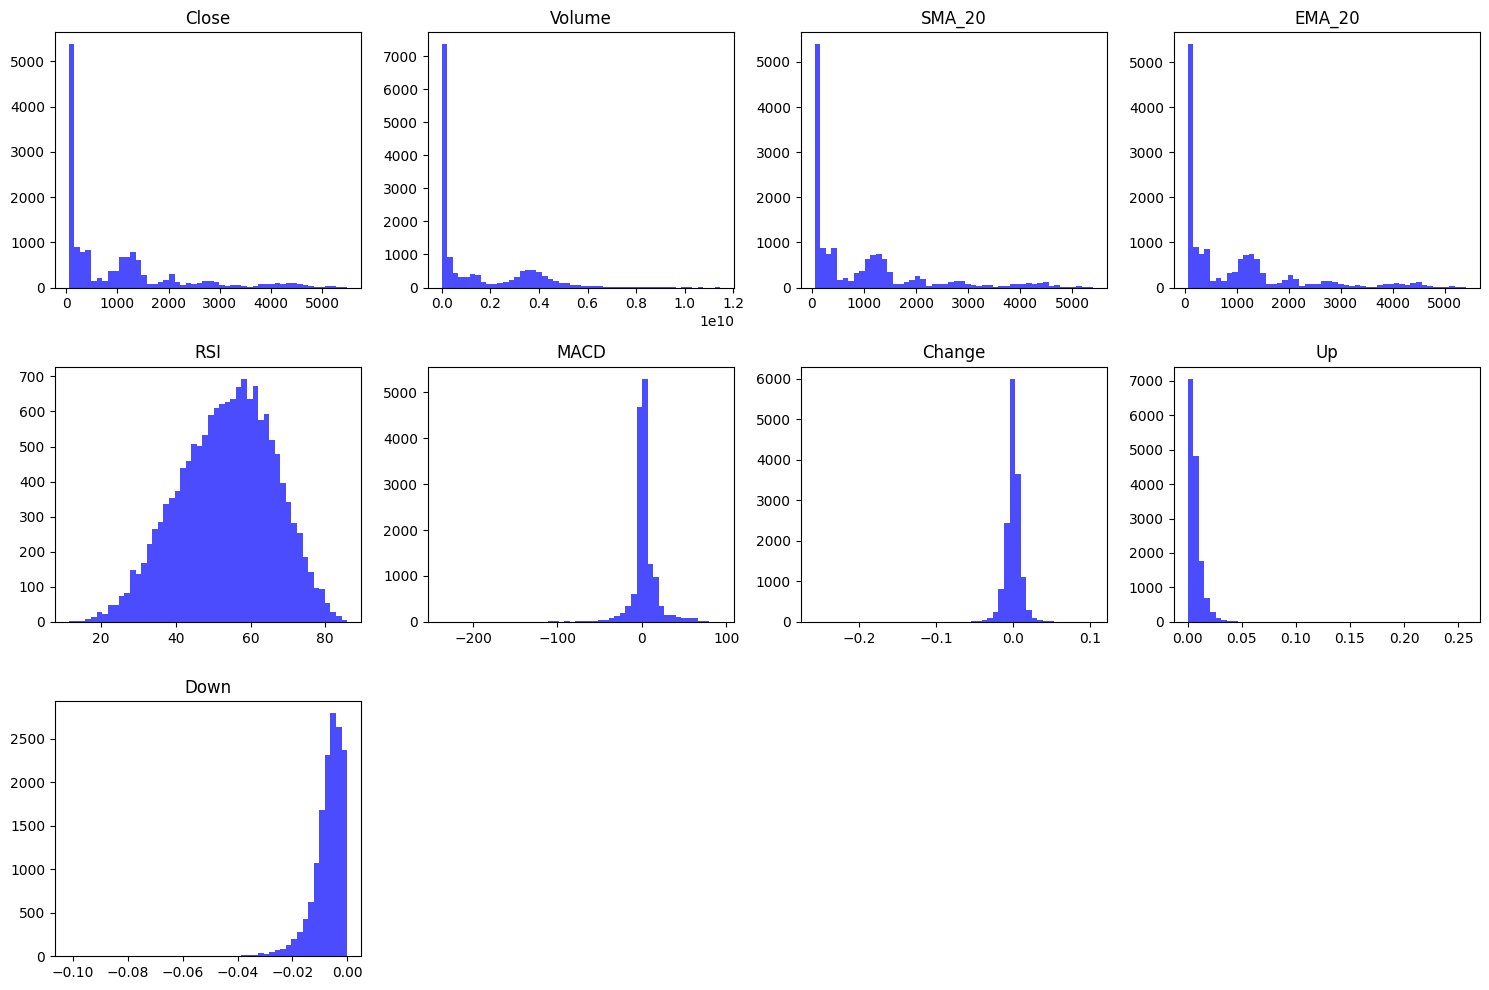

In [17]:
# Plot histograms for selected features
features_to_plot = [ 'Close', 'Volume', 'SMA_20', 'EMA_20', 'RSI', 'MACD', 'Change', 'Up', 'Down']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 4, i)
    plt.hist(df3[feature], bins=50, alpha=0.7, color='blue')
    plt.title(feature)

plt.tight_layout()
plt.show()

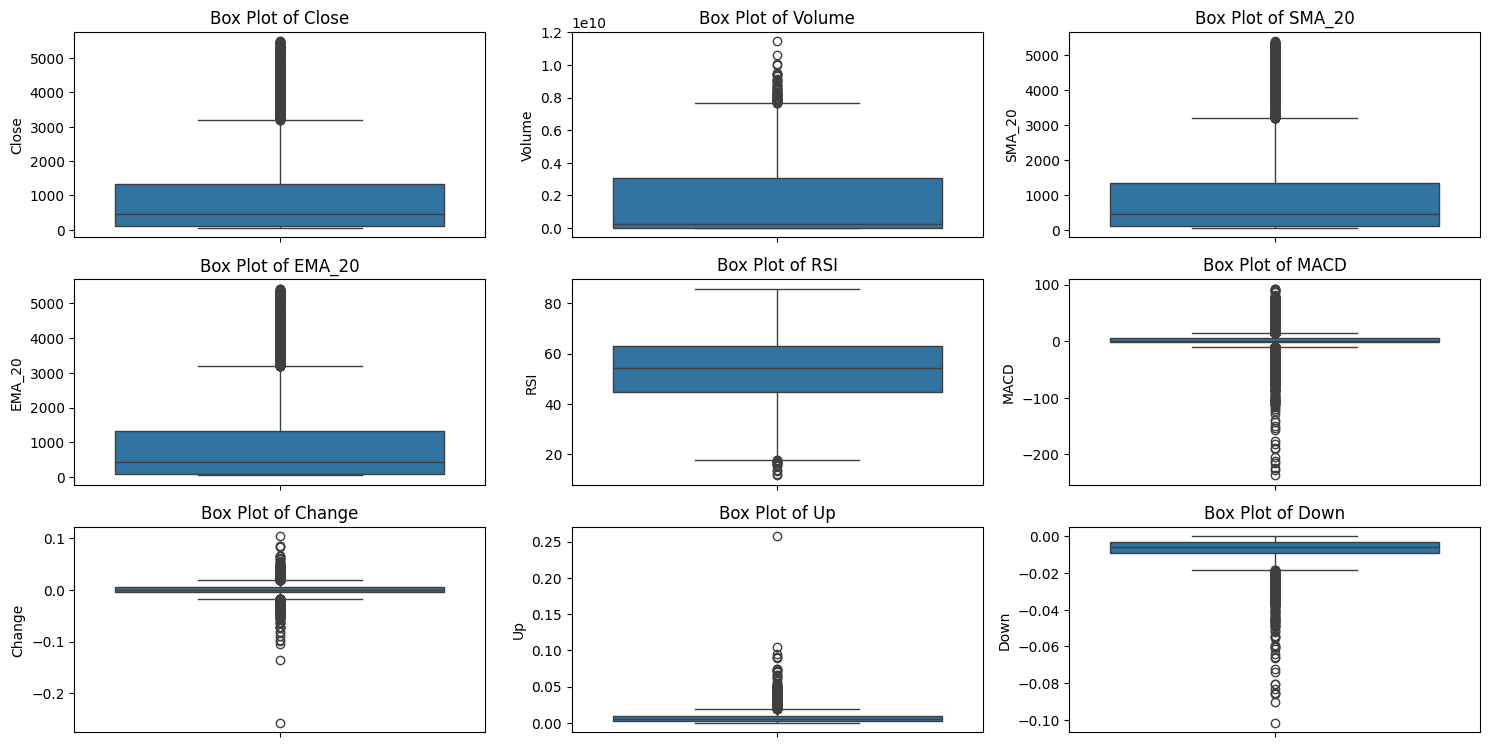

In [18]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(4, 3, i)  # Adjust the grid to fit all plots
    sns.boxplot(y=df3[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

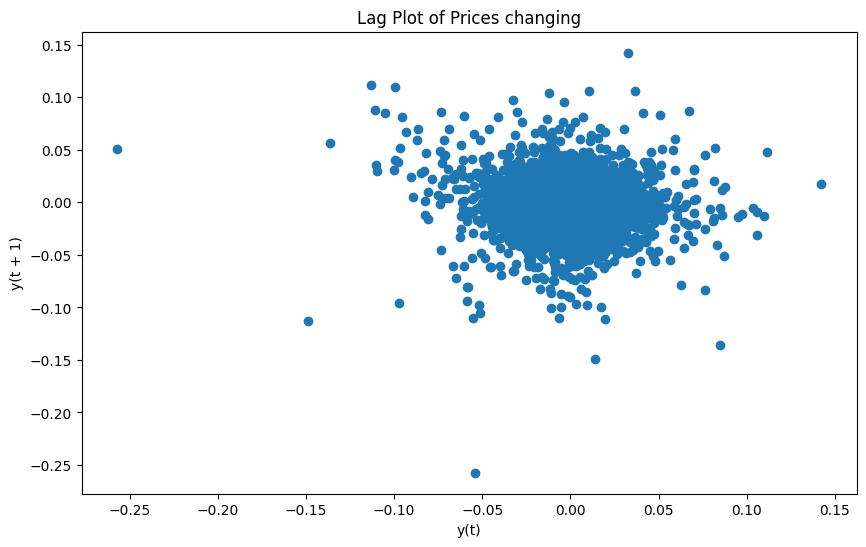

In [19]:
from pandas.plotting import lag_plot

plt.figure(figsize=(10, 6))
lag_plot(df2['Change'])
plt.title('Lag Plot of Prices changing')
plt.show()

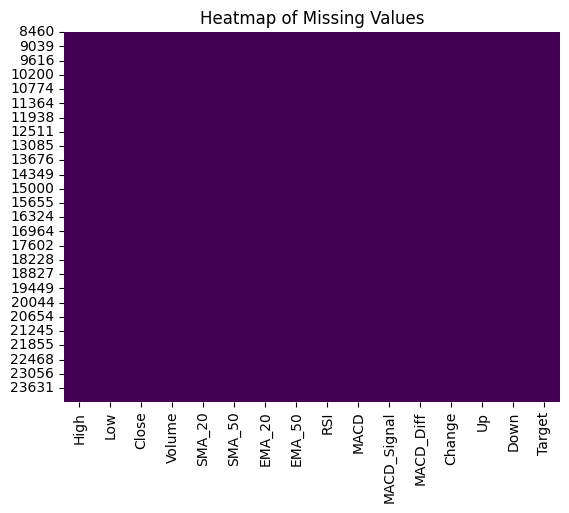

In [20]:
sns.heatmap(df3.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


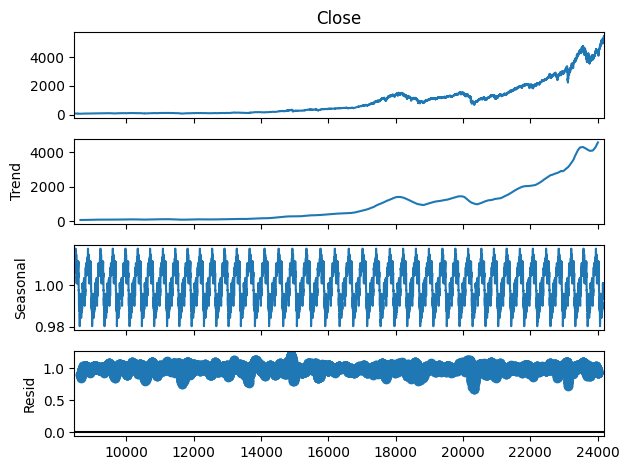

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df3['Close'], model='multiplicative', period=365)

# Plot the seasonal decomposition
result.plot()
plt.show()

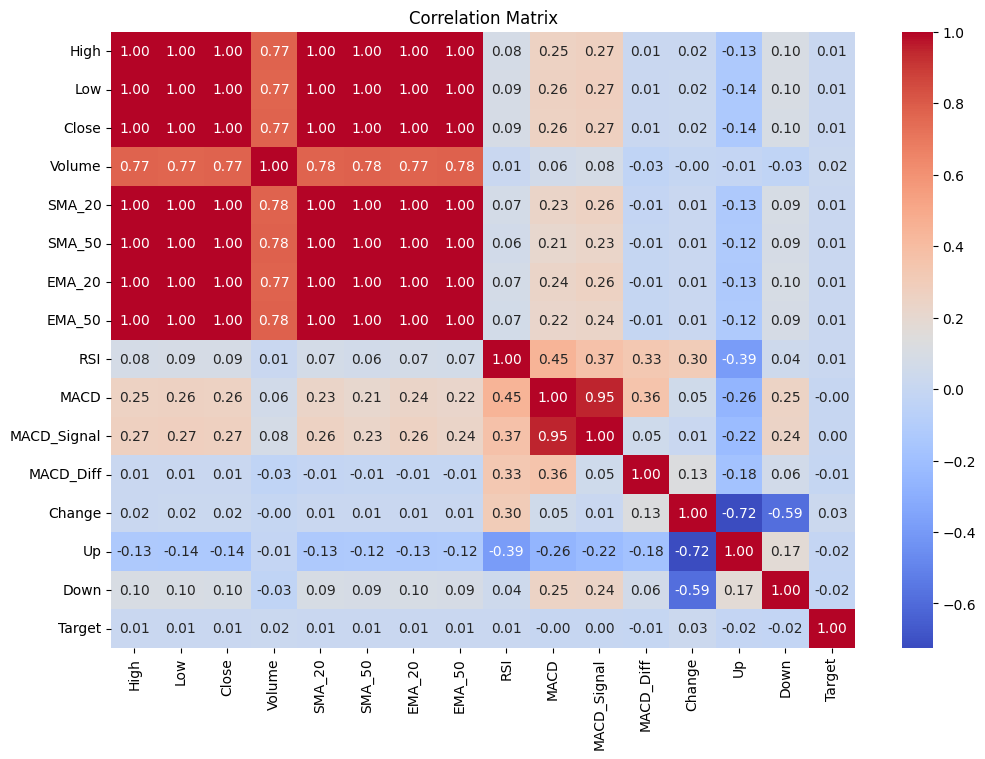

In [22]:
# Correlation matrix

correlation_matrix = df3.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [23]:
df3['Target'].value_counts()

Target
 1    5221
 0    5135
-1    4525
Name: count, dtype: int64

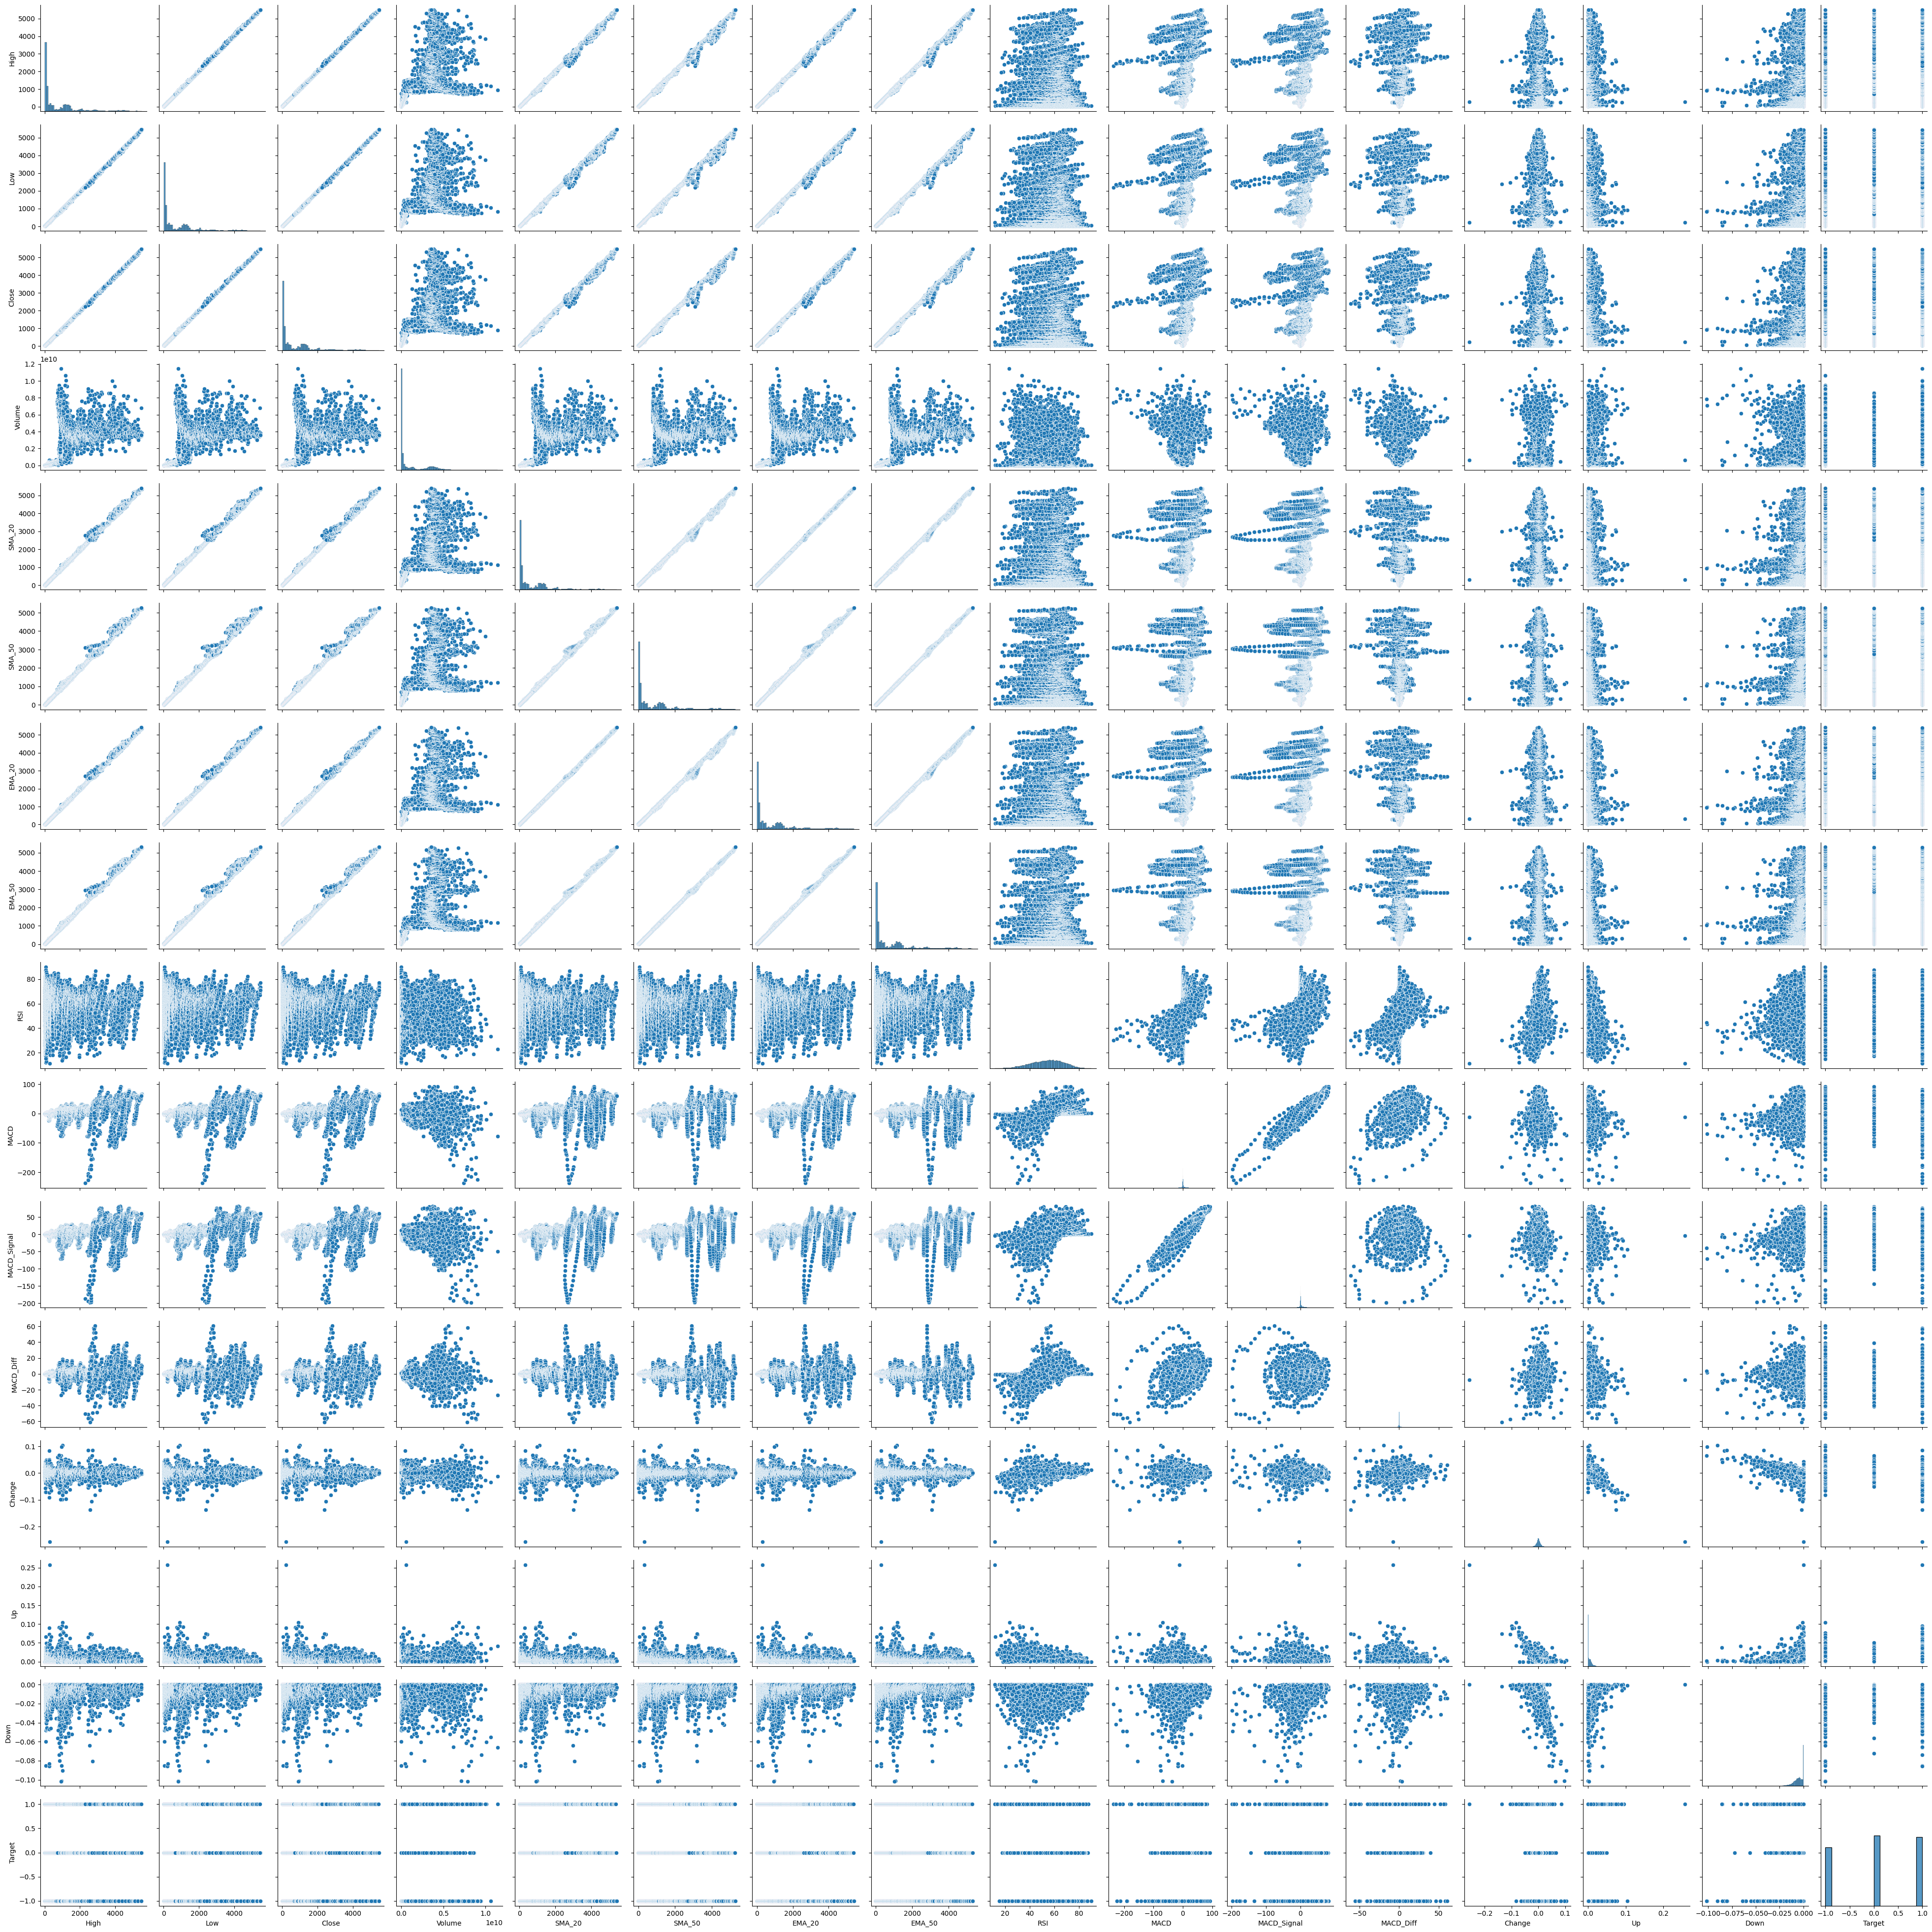

In [37]:
sns.pairplot(df3)

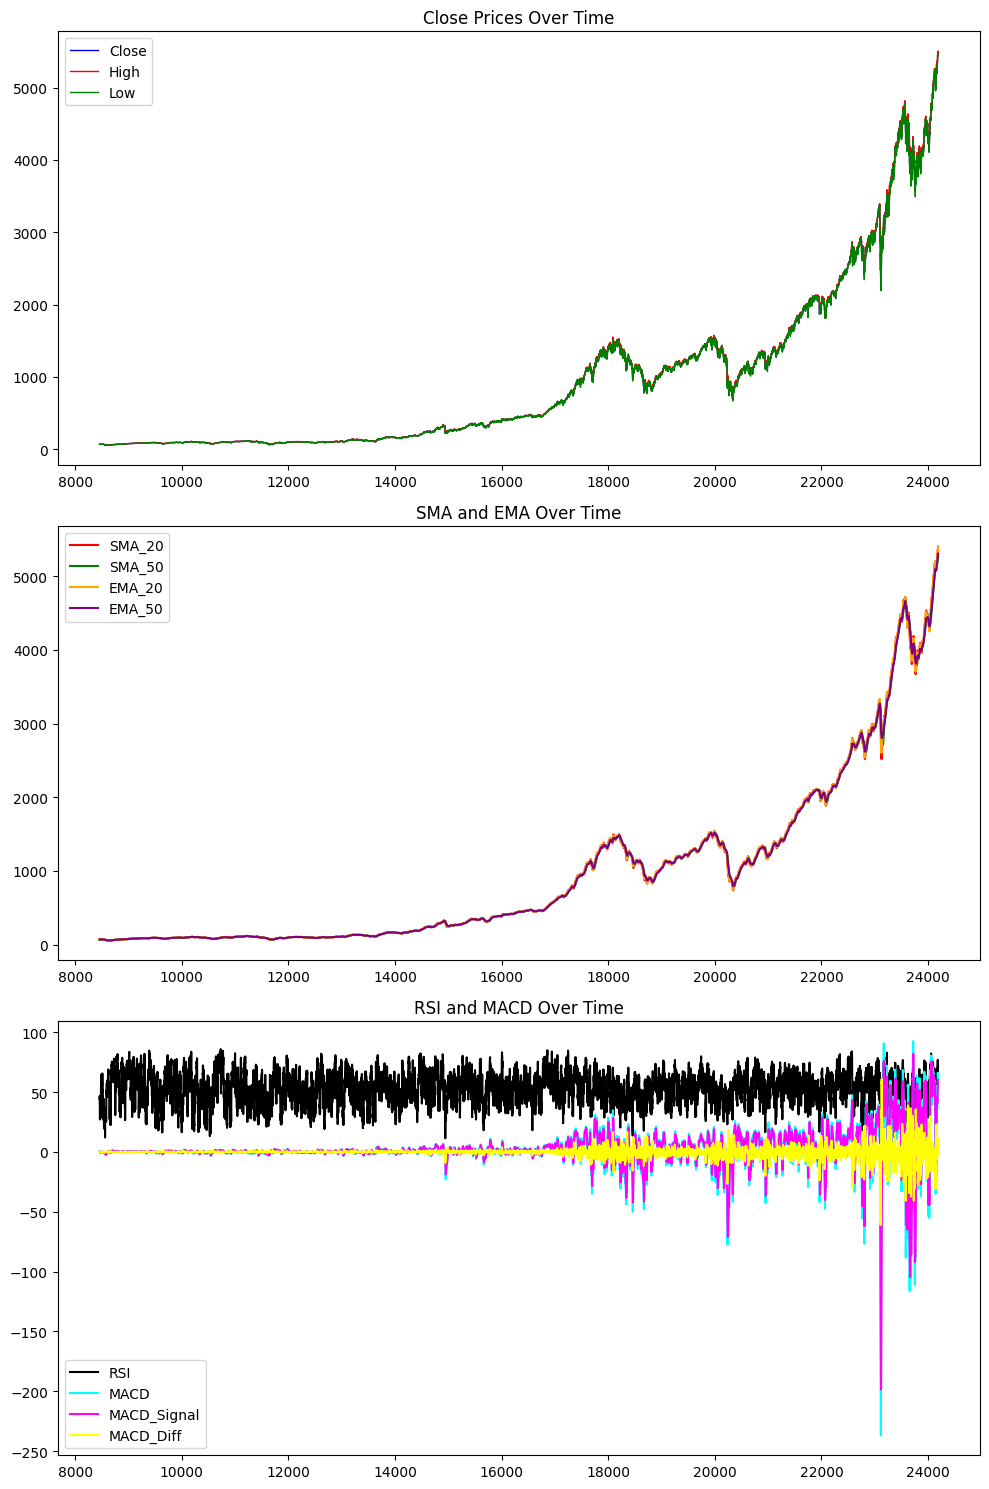

In [24]:
data = df3
# Plot time series of stock prices and key indicators
plt.figure(figsize=(10,15))

# Close prices
plt.subplot(3, 1, 1)
plt.plot(data.index, data['Close'], label='Close', color='blue',linewidth=1)
plt.plot(data.index, data['High'], label='High', color='red',linewidth=1)
plt.plot(data.index, data['Low'], label='Low', color='green',linewidth=1)
plt.title('Close Prices Over Time')
plt.legend()

# SMA and EMA
plt.subplot(3, 1, 2)
plt.plot(data.index, data['SMA_20'], label='SMA_20', color='red')
plt.plot(data.index, data['SMA_50'], label='SMA_50', color='green')
plt.plot(data.index, data['EMA_20'], label='EMA_20', color='orange')
plt.plot(data.index, data['EMA_50'], label='EMA_50', color='purple')
plt.title('SMA and EMA Over Time')
plt.legend()

# RSI and MACD
plt.subplot(3, 1, 3)
plt.plot(data.index, data['RSI'], label='RSI', color='black')
plt.plot(data.index, data['MACD'], label='MACD', color='cyan')
plt.plot(data.index, data['MACD_Signal'], label='MACD_Signal', color='magenta')
plt.plot(data.index, data['MACD_Diff'], label='MACD_Diff', color='yellow')
plt.title('RSI and MACD Over Time')
plt.legend()

plt.tight_layout()
plt.show()


In [39]:
# # Define the window size
# window_size = 5 #decrease form 30

# # Initialize lists to store rolling features and targets
# rolling_features = []
# rolling_targets = []

# # Loop over the data to create rolling window features
# for i in range(window_size, len(data)):
#     # Create the rolling window for the past 30 days
#     # rolling_window = data.iloc[i-window_size:i][['Close', 'Volume', 'SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Diff']].values.flatten()
#     rolling_window = data.iloc[i-window_size:i][['Volume', 'SMA_20',  'EMA_20', 'RSI', 'MACD', 'MACD_Signal', 'Up', 'Down', 'Change']].values.flatten()
    
#     # Append the rolling window features to the list
#     rolling_features.append(rolling_window)
    
#     # Append the target variable for the current day to the list
#     rolling_targets.append(data.iloc[i]['Target'])

# # Convert the lists to numpy arrays
# rolling_features = np.array(rolling_features)
# rolling_targets = np.array(rolling_targets)
# columns = []
# for i in range(window_size):
#     #for feature in ['Close', 'Volume', 'SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Diff']:
#     for feature in ['Close','High', 'Low', 'Volume', 'SMA_20',  'EMA_20', 'RSI', 'MACD', 'MACD_Signal']:
#         columns.append(f'{feature}_t-{window_size-i}')

# # Convert rolling features to a DataFrame
# rolling_features_df = pd.DataFrame(rolling_features, columns=columns)

# # Add the target variable to the rolling features DataFrame
# rolling_features_df['Target'] = rolling_targets
# # Display the first few rows of the DataFrame
# rolling_features_df.head()

Close_t-5  High_t-5  Low_t-5  Volume_t-5  SMA_20_t-5  EMA_20_t-5  \
0      16.66     16.66    16.66   1260000.0     16.5780   16.547629   
1      16.85     16.85    16.85   1890000.0     16.6000   16.576427   
2      16.93     16.93    16.93   2550000.0     16.6270   16.610100   
3      16.98     16.98    16.98   2010000.0     16.6545   16.645329   
4      17.08     17.08    17.08   2520000.0     16.6870   16.686726   

     RSI_t-5  MACD_t-5  MACD_Signal_t-5  Close_t-4  ...  Close_t-1   High_t-1  \
0  59.805898  0.131352         0.136696  16.850000  ...  17.080000  17.080000   
1  66.777333  0.139736         0.137304  16.930000  ...  17.030001  17.030001   
2  69.199670  0.151095         0.140062  16.980000  ...  17.090000  17.090000   
3  70.640483  0.162260         0.144502  17.080000  ...  16.760000  16.760000   
4  73.327884  0.177136         0.151029  17.030001  ...  16.670000  16.670000   

     Low_t-1  Volume_t-1  SMA_20_t-1  EMA_20_t-1    RSI_t-1  MACD_t-1  \
0  17.080000   2520000.0     16.6870   16.686726  73.327884  0.177136   
1  17.030001   2160000.0     16.7175   16.719419  69.883552  0.182784   
2  17.090000   2630000.0     16.7435   16.754712  71.607066  0.189913   
3  16.760000   2970000.0     16.7495   16.755216  53.479186  0.167008   
4  16.670000   3330000.0     16.7495   16.747100  49.777986  0.139981   

   MACD_Signal_t-1  Target  
0         0.151029     1.0  
1         0.157380    -1.0  
2         0.163886    -1.0  
3         0.164511     0.0  
4         0.159605     1.0  

[5 rows x 46 columns]

In [73]:
# Define the window size
window_size = 5 # decreased from 30

# Initialize lists to store rolling features and targets
rolling_features = []
rolling_targets = []

# Loop over the data to create rolling window features
for i in range(window_size, len(df3)):
    # Create the rolling window for the past window_size days
    rolling_window = df3.iloc[i-window_size:i][['Volume', 'SMA_20',  'EMA_20', 'RSI', 'MACD', 'MACD_Signal', 'Up', 'Down', 'Change']].values.flatten()
    
    # Append the rolling window features to the list
    rolling_features.append(rolling_window)
    
    # Append the target variable for the current day to the list
    rolling_targets.append(df3.iloc[i-1]['Target'])

# Convert the lists to numpy arrays
rolling_features = np.array(rolling_features)
rolling_targets = np.array(rolling_targets)

# Generate column names for the rolling features
columns = []
for i in range(window_size):
    for feature in ['Volume', 'SMA_20',  'EMA_20', 'RSI', 'MACD', 'MACD_Signal', 'Up', 'Down', 'Change']:
        columns.append(f'{feature}_t-{window_size-i}')

# Convert rolling features to a DataFrame
rolling_features_df = pd.DataFrame(rolling_features, columns=columns)

# Add the target variable to the rolling features DataFrame
rolling_features_df['Target'] = rolling_targets

# Display the first few rows of the DataFrame
rolling_features_df.head()


Volume_t-5  SMA_20_t-5  EMA_20_t-5    RSI_t-5  MACD_t-5  MACD_Signal_t-5  \
0   3120000.0   71.700001   71.451040  43.966599  0.053701         0.189011   
1   3590000.0   71.656001   71.420464  46.740876  0.026092         0.156427   
2   4450000.0   71.591500   71.346134  40.514343 -0.034925         0.118157   
3   4630000.0   71.475001   71.185550  31.481580 -0.160508         0.062424   
4   4620000.0   71.346001   70.988831  27.803163 -0.300148        -0.010090   

     Up_t-5  Down_t-5  Change_t-5  Volume_t-4  ...  Volume_t-1  SMA_20_t-1  \
0  0.014092 -0.003523   -0.008315   3590000.0  ...   4620000.0   71.346001   
1  0.004921 -0.010544    0.002390   4450000.0  ...   3600000.0   71.201501   
2  0.013873 -0.002690   -0.006937   4630000.0  ...   3300000.0   71.030001   
3  0.016939 -0.004450   -0.014068   4620000.0  ...   3390000.0   70.866501   
4  0.010417 -0.013744   -0.007813   3600000.0  ...   3730000.0   70.720501   

   EMA_20_t-1    RSI_t-1  MACD_t-1  MACD_Signal_t-1    Up_t-1  Down_t-1  \
0   70.988831  27.803163 -0.300148        -0.010090  0.010417 -0.013744   
1   70.813705  28.304340 -0.403738        -0.088820  0.011280 -0.004628   
2   70.637161  27.024738 -0.495455        -0.170147  0.008991 -0.004930   
3   70.516480  33.962589 -0.528960        -0.241910  0.002451 -0.011532   
4   70.430148  37.696518 -0.530036        -0.299535  0.008045 -0.005459   

   Change_t-1  Target  
0   -0.007813     0.0  
1    0.000434     0.0  
2   -0.002755     1.0  
3    0.005910     1.0  
4    0.003448     0.0  

[5 rows x 46 columns]

In [74]:
rolling_features_df.shape

(14876, 46)

In [75]:
rolling_features_df.to_csv('rolling_feature.csv')